In [1]:
#Import libraries
import numpy as np
import pandas as pd
import torch
import os
import glob
import matplotlib.pyplot as plt

def get_file_names(folder):
    #Listing entries present in given folder
    entries = os.listdir(folder)
    for i in entries:
        if 'csv' not in i:
            entries.remove(i)
    return sorted(entries, reverse=True)[0:12]


#Reading csv files from given folder
root = "../"
path = root + 'processed_data'
all_files = glob.glob(path + "/*.csv")
li = []
std_list = []
average_list = []
for filename in all_files:
    df = pd.read_csv(filename,index_col = None, header = 0)
    li.append(df)
    
#Concatenating all the dataframes into a single frame
frame = pd.concat(li,axis=0,ignore_index = True)

df = frame
"""
root = "../"
folder =root+"processed_data/"
csv_files = get_file_names(folder)
frames = []
for i in csv_files:
    frames.append(pd.read_csv(root+"processed_data/"+i))
df = pd.concat(frames)
"""
df = df.reset_index(drop=True)

#df = pd.read_csv(csv_file)

/Users/BrianLam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



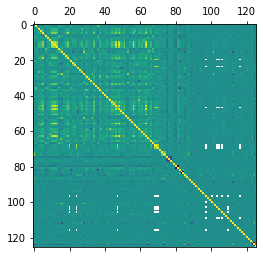

In [4]:
plt.matshow(df.corr())

In [5]:
corr = df.corrwith(df["price"])

In [6]:
pd.options.display.max_rows = None
corr

accommodates                                       0.511505
amenities_24-hour check-in                         0.050439
amenities_Air conditioning                         0.182726
amenities_BBQ grill                                0.075320
amenities_Bathtub                                  0.139184
amenities_Bed linens                               0.050609
amenities_Breakfast                               -0.009816
amenities_Buzzer/wireless intercom                 0.060122
amenities_Cable TV                                 0.176276
amenities_Carbon monoxide detector                 0.039927
amenities_Coffee maker                             0.121541
amenities_Cooking basics                           0.104531
amenities_Dishes and silverware                    0.085790
amenities_Dishwasher                               0.242555
amenities_Doorman                                  0.106809
amenities_Dryer                                    0.188212
amenities_Elevator                      

In [8]:
correlation = corr.reset_index().values.tolist()

In [9]:
correlation = sorted(correlation, key = lambda test_list: abs(test_list[1]), reverse=True)

In [10]:
len(correlation)

126

In [15]:
accum = 0
accum_list = []
for i in correlation:
    if abs(i[1]) >= 0.05:
        accum += 1
        accum_list.append(i[0])
print(accum)
print(accum_list)

67
['price', 'accommodates', 'room_type_Entire home/apt', 'room_type_Private room', 'bedrooms', 'beds', 'amenities_TV', 'bathrooms', 'amenities_Elevator', 'latitude', 'amenities_Gym', 'amenities_Lock on bedroom door', 'property_type_Condominium', 'amenities_Dishwasher', 'amenities_Dryer', 'amenities_Air conditioning', 'amenities_Pool', 'amenities_Cable TV', 'amenities_Washer', 'amenities_Family/kid friendly', 'amenities_Hot tub', 'amenities_Iron', 'cancellation_policy_strict_14_with_grace_period', 'amenities_Kitchen', 'amenities_Patio or balcony', 'amenities_Hair dryer', 'amenities_Bathtub', 'property_type_House', 'cancellation_policy_flexible', 'amenities_Coffee maker', 'amenities_Oven', 'amenities_Doorman', 'amenities_Shampoo', 'amenities_Cooking basics', 'amenities_Long term stays allowed', 'amenities_Stove', 'property_type_Serviced apartment', 'amenities_Room-darkening shades', 'amenities_Wheelchair accessible', 'amenities_Paid parking on premises', 'amenities_Self check-in', 'prop

In [130]:
list_of_keep = ['price', 'accommodates', 'room_type_Entire home/apt', 'room_type_Private room', 'bedrooms', 'beds', 
                'amenities_TV', 'bathrooms', 'amenities_Elevator', 'latitude', 'amenities_Gym', 
                'amenities_Lock on bedroom door', 'property_type_Condominium', 'amenities_Dishwasher', 
                'amenities_Dryer', 'amenities_Air conditioning', 'amenities_Pool', 'amenities_Cable TV', 
                'amenities_Washer', 'amenities_Family/kid friendly', 'amenities_Hot tub', 'amenities_Iron', 
                'cancellation_policy_strict_14_with_grace_period', 'amenities_Kitchen', 'amenities_Patio or balcony', 
                'amenities_Hair dryer', 'amenities_Bathtub', 'property_type_House', 'cancellation_policy_flexible', 
                'amenities_Coffee maker', 'amenities_Oven', 'amenities_Doorman', 'amenities_Shampoo', 
                'amenities_Cooking basics', 'amenities_Long term stays allowed', 'amenities_Stove', 
                'property_type_Serviced apartment', 'amenities_Room-darkening shades', 'amenities_Wheelchair accessible', 
                'amenities_Paid parking on premises', 'amenities_Self check-in', 'property_type_Guest suite', 
                'amenities_Dishes and silverware', 'property_type_Bungalow', 'room_type_Shared room', 
                'amenities_Pets allowed', 'instant_bookable_f', 'instant_bookable_t', 'amenities_BBQ grill', 
                'amenities_Free street parking', 'amenities_Lockbox', 'property_type_Loft', 'amenities_Lake access', 
                'amenities_Single level home', 'amenities_Indoor fireplace', 'amenities_Microwave', 
                'property_type_Apartment', 'amenities_Ethernet connection', 'amenities_Private entrance', 
                'amenities_Refrigerator', 'amenities_Paid parking off premises', 'amenities_Laptop friendly workspace', 
                'amenities_Buzzer/wireless intercom', 'amenities_Free parking on premises', 
                'amenities_Extra pillows and blankets', 'amenities_Bed linens', 'amenities_24-hour check-in','id','last_scraped']

['price',
 'accommodates',
 'bedrooms',
 'beds',
 'room_type_codes',
 'bathrooms',
 'TV',
 'district',
 'district_group',
 'Dishwasher',
 'Lock on bedroom door',
 'Gym',
 'Elevator',
 'Dryer',
 'Cable TV',
 'Washer',
 'Air conditioning',
 'Family/kid friendly',
 'Pool',
 'Patio or balcony',
 'Iron',
 'Hot tub',
 'Indoor fireplace',
 'cancellation_policy_codes',
 'Bathtub',
 'Kitchen',
 'Hair dryer',
 'Coffee maker',
 'Oven',
 'Room-darkening shades']